In [1]:
# Loading neccesary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import tensorflow as tf
from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import gzip, pickle, pickletools
import os
import sqlite3

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [10]:
# Load dataset
filename = 'datamart-export.csv'
dataset = pd.read_csv(filename,  delim_whitespace=False)

In [11]:
dataset.isna().sum()

Report Date               42
Purchase Type              0
Selling Basis              0
Class                      0
Grade                      0
Head Count            157245
Weight Range Low      157245
Weight Range High     157245
Average Weight        157245
Dressed Percentage    214876
Price Range Low       157245
Price Range High      157245
Weighted Avg Price    157245
dtype: int64

In [12]:
dataset.dropna(inplace=True)
dataset['Report Year'] = pd.DatetimeIndex(dataset['Report Date']).year
dataset['Report Month'] = pd.DatetimeIndex(dataset['Report Date']).month
dataset.head()

,Report Date,Purchase Type,Selling Basis,Class,Grade,Head Count,Weight Range Low,Weight Range High,Average Weight,Dressed Percentage,Price Range Low,Price Range High,Weighted Avg Price,Report Year,Report Month
0,9/4/20,FORMULA NET,Live,Mixed Steer/Heifer,Over 80% Choice,162.0,1348.0,1348.0,1348.0,63.2,106.00,106.00,106.00,2020,9
1,9/4/20,FORMULA NET,Live,Mixed Steer/Heifer,65 - 80% Choice,144.0,1256.0,1256.0,1256.0,64.4,106.75,106.75,106.75,2020,9
4,9/4/20,FORMULA NET,Live,Steer,Over 80% Choice,1289.0,1380.0,1574.0,1515.0,63.9,106.00,107.66,106.33,2020,9
5,9/4/20,FORMULA NET,Live,Steer,65 - 80% Choice,711.0,1242.0,1520.0,1412.0,64.2,104.90,108.04,106.64,2020,9
6,9/4/20,FORMULA NET,Live,Steer,35 - 65% Choice,1515.0,1094.0,1618.0,1340.0,64.5,103.00,108.04,106.17,2020,9


In [13]:
dataset = dataset.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,13,14,12]]
columns = ['purchase_type', 'selling_basis', 'class','grade','head_count',
           'weight_range_low', 'weight_range_high','average_weight',
           'dressed_percentage', 'price_range_low','price_range_high', 
           'report_year', 'report_month','weighted_avg_price']

dataset.columns = columns
dataset.head()

,purchase_type,selling_basis,class,grade,head_count,weight_range_low,weight_range_high,average_weight,dressed_percentage,price_range_low,price_range_high,report_year,report_month,weighted_avg_price
0,FORMULA NET,Live,Mixed Steer/Heifer,Over 80% Choice,162.0,1348.0,1348.0,1348.0,63.2,106.00,106.00,2020,9,106.00
1,FORMULA NET,Live,Mixed Steer/Heifer,65 - 80% Choice,144.0,1256.0,1256.0,1256.0,64.4,106.75,106.75,2020,9,106.75
4,FORMULA NET,Live,Steer,Over 80% Choice,1289.0,1380.0,1574.0,1515.0,63.9,106.00,107.66,2020,9,106.33
5,FORMULA NET,Live,Steer,65 - 80% Choice,711.0,1242.0,1520.0,1412.0,64.2,104.90,108.04,2020,9,106.64
6,FORMULA NET,Live,Steer,35 - 65% Choice,1515.0,1094.0,1618.0,1340.0,64.5,103.00,108.04,2020,9,106.17


In [6]:
print(dataset.dtypes)

purchase_type          object
selling_basis          object
class                  object
grade                  object
head_count            float64
weight_range_low      float64
weight_range_high     float64
average_weight        float64
dressed_percentage    float64
price_range_low       float64
price_range_high      float64
report_year             int64
report_month            int64
weighted_avg_price    float64
dtype: object


In [14]:
dataset.isna().sum()

purchase_type         0
selling_basis         0
class                 0
grade                 0
head_count            0
weight_range_low      0
weight_range_high     0
average_weight        0
dressed_percentage    0
price_range_low       0
price_range_high      0
report_year           0
report_month          0
weighted_avg_price    0
dtype: int64

In [16]:
dataset.shape

(154388, 14)

In [27]:
dataset = dataset.sample(5000)

In [28]:
dataset.head()

,purchase_type,selling_basis,class,grade,head_count,weight_range_low,weight_range_high,average_weight,dressed_percentage,price_range_low,price_range_high,report_year,report_month,weighted_avg_price
248767,NEGOTIATED GRID NET,Live,Heifer,65 - 80% Choice,47.0,1150.0,1150.0,1150.0,63.8,82.50,82.50,2009,2,82.50
59211,NEGOTIATED GRID NET,Dressed,Dairybred Steer/Heifer,Over 80% Choice,455.0,714.0,969.0,856.0,59.8,136.45,174.47,2017,12,153.01
147566,NEGOTIATED GRID NET,Dressed,Steer,Over 80% Choice,2434.0,768.0,999.0,940.0,63.0,204.06,212.48,2013,11,205.34
200378,FORMULA NET,Dressed,Mixed Steer/Heifer/Cow,65 - 80% Choice,1043.0,685.0,824.0,788.0,64.8,179.74,185.40,2011,5,183.37
241783,FORMULA NET,Dressed,Mixed Steer/Heifer/Cow,35 - 65% Choice,384.0,711.0,760.0,745.0,65.5,129.53,130.49,2009,6,129.67


In [29]:
# Encoding categorical data
target = dataset.pop('weighted_avg_price')
columns_to_encode = ['purchase_type','selling_basis','class','grade']
dataset = pd.get_dummies(dataset, columns = columns_to_encode)
#dataset.insert(22, 'weighted_avg_price', target)
dataset_x = dataset
dataset_y = target
print(dataset.dtypes)

head_count                           float64
weight_range_low                     float64
weight_range_high                    float64
average_weight                       float64
dressed_percentage                   float64
price_range_low                      float64
price_range_high                     float64
report_year                            int64
report_month                           int64
purchase_type_FORMULA NET              uint8
purchase_type_NEGOTIATED GRID NET      uint8
selling_basis_Dressed                  uint8
selling_basis_Live                     uint8
class_All Steers & Heifers             uint8
class_Dairybred Steer/Heifer           uint8
class_Heifer                           uint8
class_Mixed Steer/Heifer               uint8
class_Mixed Steer/Heifer/Cow           uint8
class_Steer                            uint8
grade_ 0 - 35% Choice                  uint8
grade_35 - 65% Choice                  uint8
grade_65 - 80% Choice                  uint8
grade_Over

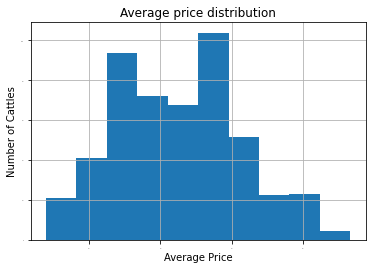

In [30]:
target.hist(xlabelsize=1, ylabelsize=1)
plt.title('Average price distribution')
plt.xlabel('Average Price')
plt.ylabel('Number of Cattles')
plt.show()

In [31]:
target_norm = (target - target.mean()) / target.std()
target_norm.head()

248767   -1.834114
59211    -0.220731
147566    0.976664
200378    0.473955
241783   -0.754788
Name: weighted_avg_price, dtype: float64

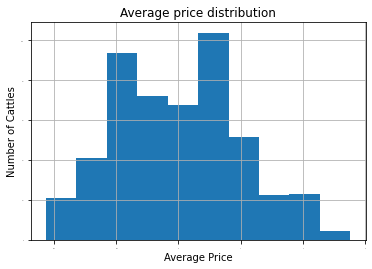

In [32]:
target_norm.hist(xlabelsize=1, ylabelsize=1)
plt.title('Average price distribution')
plt.xlabel('Average Price')
plt.ylabel('Number of Cattles')
plt.show()

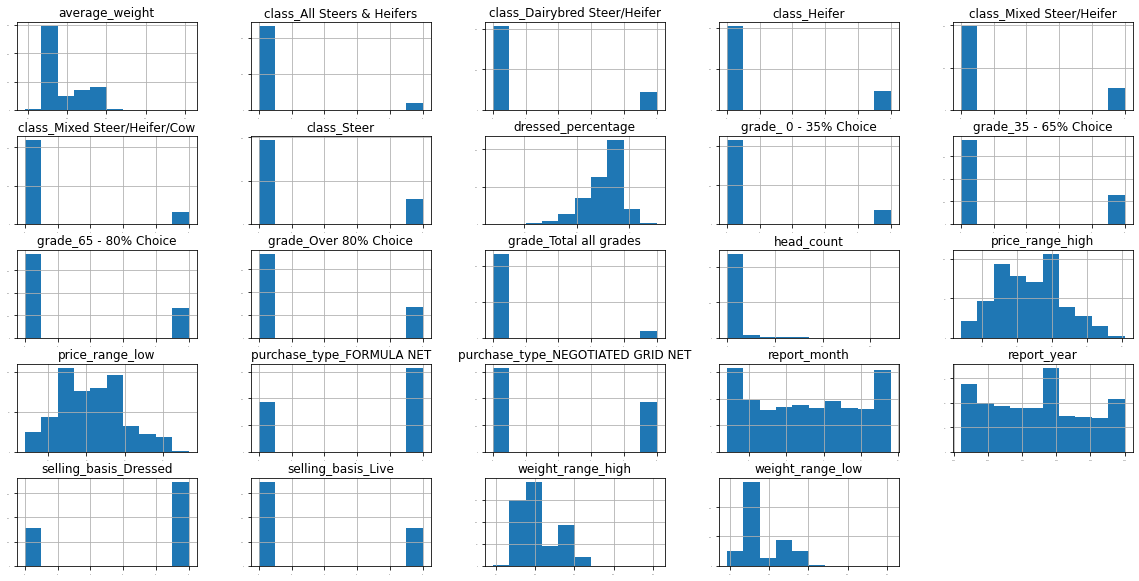

In [33]:
# histograms
plt.rc('figure', figsize=(20,10))
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

<ipython-input-34-5d0e1adf515d>:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dataset_normalized.colums = columns


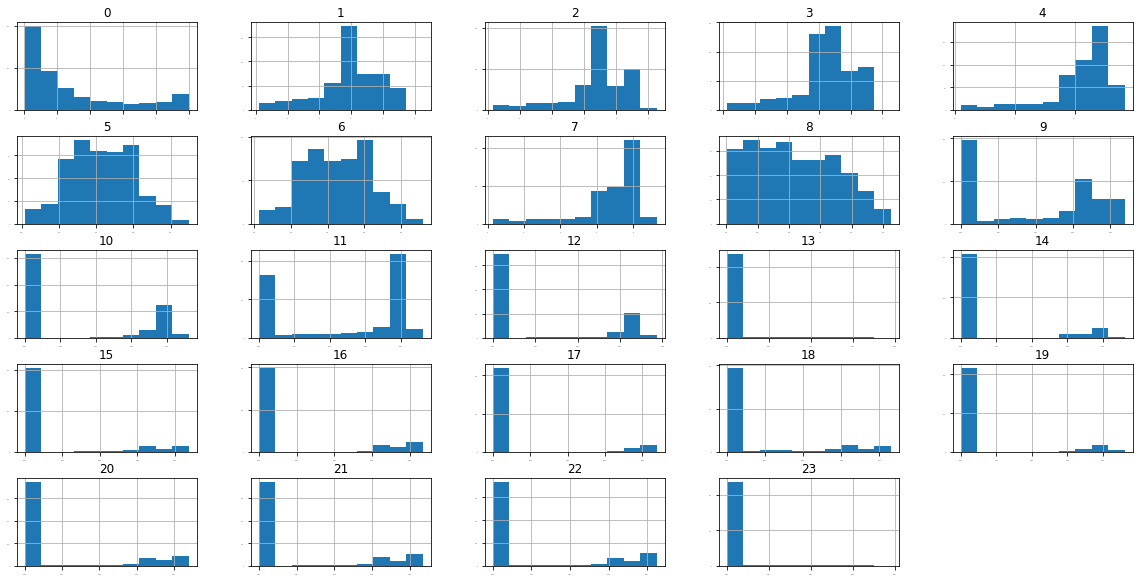

(5000, 24)


In [34]:
columns = dataset.columns
array = dataset.values
# separate array into input and output components

scaler = Normalizer().fit(array)
dataset_normalized = scaler.transform(array)
# summarize transformed data
set_printoptions(precision=3)
#print(normalizedX[0:5,:])
#normalizedX.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
#pyplot.show()
dataset_normalized = pd.DataFrame(data=dataset_normalized)
dataset_normalized.colums = columns
#print(pd.DataFrame(data=normalizedX))
dataset_normalized.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()
print(dataset_normalized.shape)

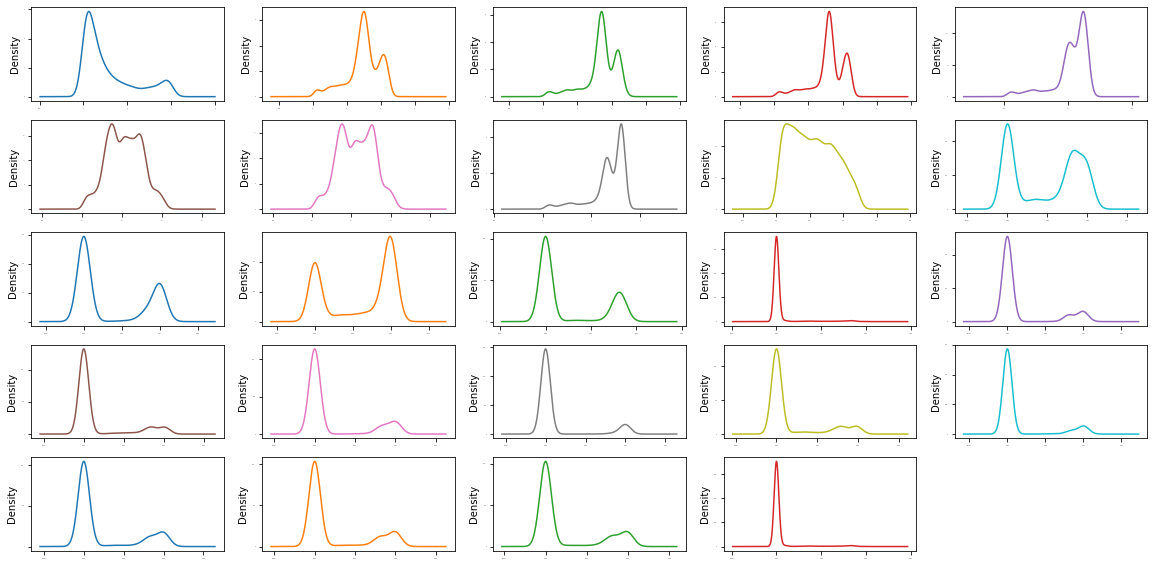

In [35]:
# density
dataset_normalized.plot(kind='density', subplots=True, layout=(5,5), sharex=False, legend=False,
fontsize=1)
plt.show()

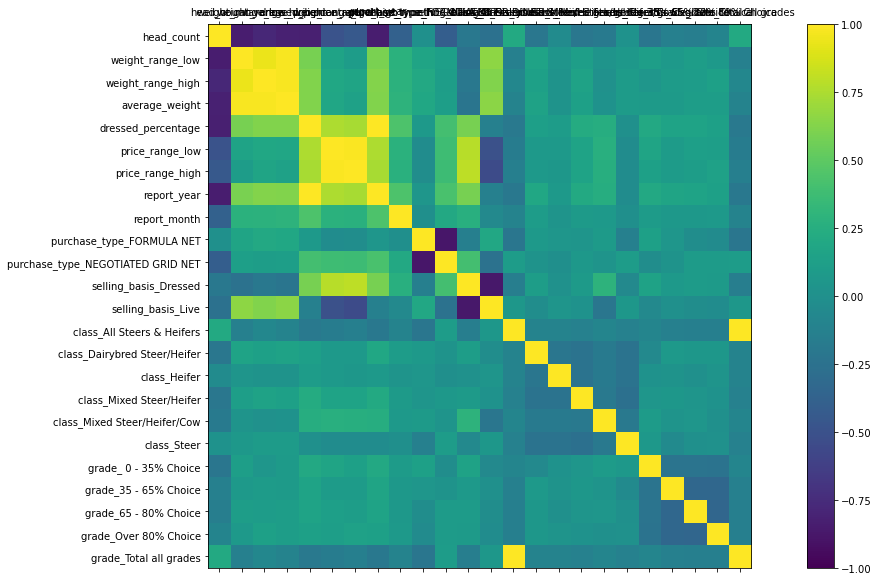

In [36]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset_normalized.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,24,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
plt.show()

In [37]:
dataset_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.016593,0.405991,0.405991,0.405991,0.022524,0.029125,0.029125,0.709249,0.000706,0.000000,...,0.000000,0.000353,0.0,0.000000,0.000000,0.0,0.000000,0.000353,0.000000,0.0
1,0.178334,0.279847,0.379793,0.335503,0.023438,0.053481,0.068382,0.790550,0.004703,0.000000,...,0.000392,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000392,0.0
2,0.687372,0.216887,0.282122,0.265460,0.017791,0.057627,0.060005,0.568480,0.003106,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000282,0.0,0.000000,0.000000,0.000282,0.0
3,0.395007,0.259425,0.312067,0.298433,0.024541,0.068072,0.070215,0.761610,0.001894,0.000379,...,0.000000,0.000000,0.0,0.000379,0.000000,0.0,0.000000,0.000379,0.000000,0.0
4,0.158631,0.293716,0.313958,0.307761,0.027058,0.053509,0.053906,0.829923,0.002479,0.000413,...,0.000000,0.000000,0.0,0.000413,0.000000,0.0,0.000413,0.000000,0.000000,0.0


# Validation Dataset

In [38]:
dataset_normalized.shape

(5000, 24)

In [39]:
# Split-out validation dataset
X = dataset_normalized.values
Y = target.values
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [40]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [41]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
#models.append(('SVR', SVR()))

In [42]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: Futur

LR: -89.271421 (9.734883)
LASSO: -1443.860967 (73.776702)
EN: -1855.777969 (85.099219)
KNN: -185.854283 (12.855387)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


CART: -72.393906 (22.455208)


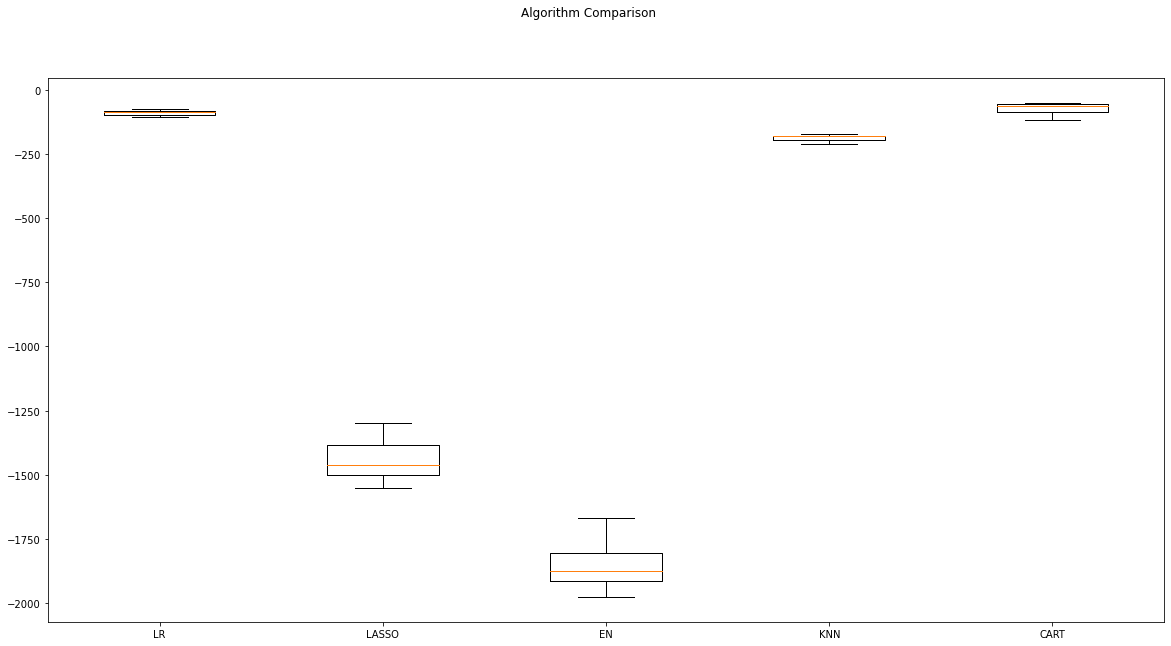

In [43]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Standardize the dataset

In [44]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
#pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledLR: -89.261531 (9.751981)
ScaledLASSO: -102.101183 (10.555685)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledEN: -368.221115 (14.344271)
ScaledKNN: -238.331227 (22.594020)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledCART: -71.904992 (21.095389)


# Compare Algorithms

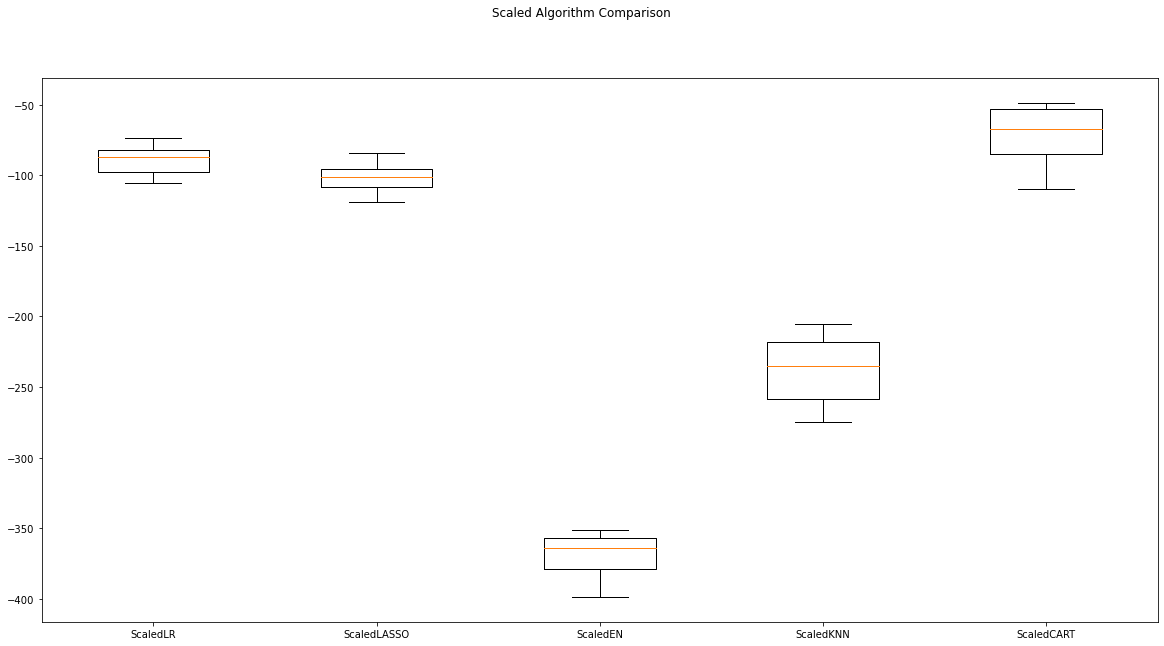

In [45]:
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Ensemble Methods

In [46]:
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
    AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
    GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
    RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
    ExtraTreesRegressor())])))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledAB: -312.124280 (40.687025)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledGBM: -54.428128 (5.378761)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledRF: -37.318337 (7.615128)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledET: -21.966143 (3.732607)


# Compare Algorithms

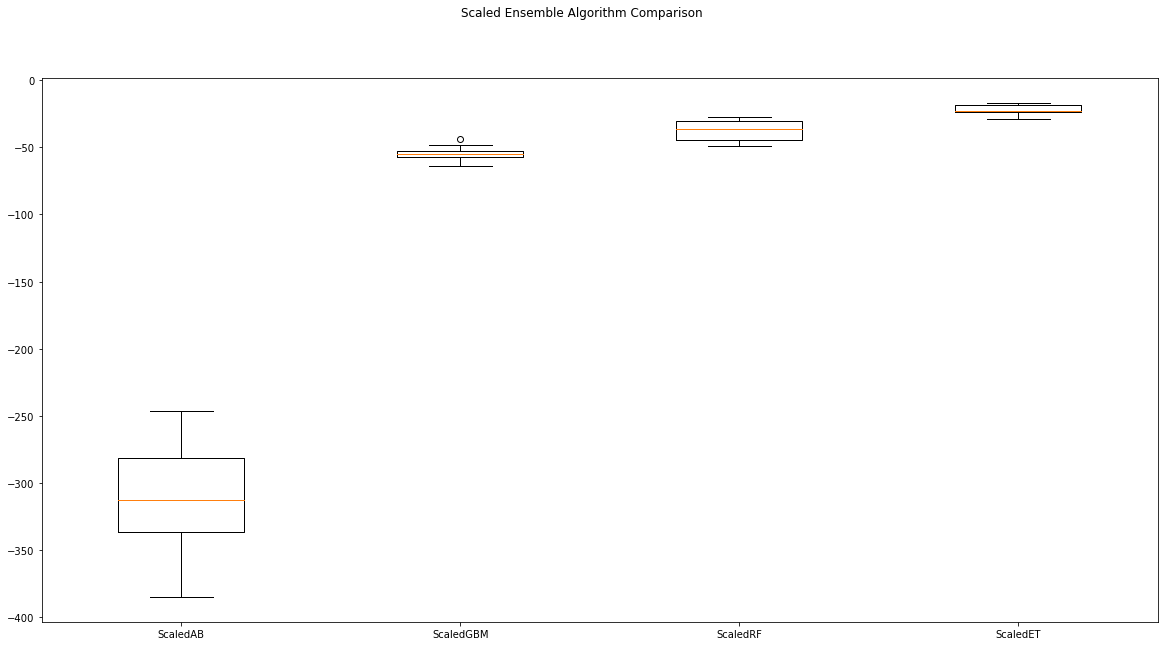

In [47]:
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [48]:
# Tune scaled ExtraTreesRegressor
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [49]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -21.731501 using {'n_estimators': 400}
-24.148130 (4.222107) with: {'n_estimators': 50}
-22.943168 (3.709180) with: {'n_estimators': 100}
-22.410384 (3.673789) with: {'n_estimators': 150}
-22.293994 (3.486967) with: {'n_estimators': 200}
-22.062313 (3.421545) with: {'n_estimators': 250}
-21.966089 (3.323562) with: {'n_estimators': 300}
-21.871715 (3.328156) with: {'n_estimators': 350}
-21.731501 (3.320945) with: {'n_estimators': 400}


# prepare the model

# Finalize the model

In [50]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(random_state=seed, n_estimators=400)
usda_model = model.fit(rescaledX, Y_train)

In [51]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

26.349101752317488


In [52]:
type(usda_model)

sklearn.ensemble._forest.ExtraTreesRegressor

In [53]:
usda_model

ExtraTreesRegressor(n_estimators=400, random_state=7)

In [135]:
with open('usda_model.pickle', 'wb') as f:
    pickle.dump(usda_model, f)

In [132]:
type(usda_model)

sklearn.ensemble._forest.ExtraTreesRegressor

In [54]:
rescaledValidationX[0]

array([-0.874,  0.397, -0.049,  0.164,  0.517,  2.293,  2.07 ,  0.68 ,
       -0.446, -1.157,  1.369,  0.866, -0.664, -0.229, -0.462, -0.466,
       -0.52 ,  2.684, -0.503, -0.399, -0.569,  1.961, -0.592, -0.229])

In [55]:
X_validation[0]

array([1.665e-02, 3.366e-01, 3.366e-01, 3.366e-01, 2.387e-02, 1.029e-01,
       1.029e-01, 7.988e-01, 1.586e-03, 0.000e+00, 3.964e-04, 3.964e-04,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.964e-04,
       0.000e+00, 0.000e+00, 0.000e+00, 3.964e-04, 0.000e+00, 0.000e+00])

In [61]:
user_data = [1025.0,1342.0,1575.0,1465.0,63.6,101.84,115.82,2020.0,9.0,
             1.0,0.0,
             0.0,1.0,
             0.0,0.0,0.0,1.0,0.0,0.0,
             0.0,0.0,0.0,1.0,0.0]
len(user_data)

24

In [62]:
array = np.asarray(user_data)
user_data_norm = (array - array.mean()) / array.std()
user_data_norm

array([ 1.142,  1.657,  2.035,  1.856, -0.419, -0.357, -0.334,  2.758,
       -0.508, -0.521, -0.522, -0.522, -0.521, -0.522, -0.522, -0.522,
       -0.521, -0.522, -0.522, -0.522, -0.522, -0.522, -0.521, -0.522])

In [ ]:
x = user_data
normalized_user_data = x / np.linalg.norm(x,ord=None, axis=None, keepdims=False)
array = np.asarray(normalized_user_data)
user_data_norm = (normalized_user_data - normalized_user_data.mean()) / normalized_user_data.std()
user_data_norm

In [ ]:
array = np.asarray(user_data_norm).reshape(-1, 24)
model.predict(array)

In [ ]:
filepath = "usda_model.pkl"
with gzip.open(filepath, "wb") as f:
    pickled = pickle.dumps(usda_model)
    optimized_pickle = pickletools.optimize(pickled)
    f.write(optimized_pickle)

In [63]:
dataset.columns

array([ 1.142,  1.657,  2.035,  1.856, -0.419, -0.357, -0.334,  2.758,
       -0.508, -0.521, -0.522, -0.522, -0.521, -0.522, -0.522, -0.522,
       -0.521, -0.522, -0.522, -0.522, -0.522, -0.522, -0.521, -0.522])

In [64]:
array = np.asarray(user_data_norm).reshape(-1, 24)
model.predict(array)

array([156.668])

In [65]:
filepath = "usda_model.pkl"
with gzip.open(filepath, "wb") as f:
    pickled = pickle.dumps(usda_model)
    optimized_pickle = pickletools.optimize(pickled)
    f.write(optimized_pickle)

In [139]:
dataset.columns

Index(['head_count', 'weight_range_low', 'weight_range_high', 'average_weight',
       'dressed_percentage', 'price_range_low', 'price_range_high',
       'report_year', 'report_month', 'purchase_type_FORMULA NET',
       'purchase_type_NEGOTIATED GRID NET', 'selling_basis_Dressed',
       'selling_basis_Live', 'class_All Steers & Heifers',
       'class_Dairybred Steer/Heifer', 'class_Heifer',
       'class_Mixed Steer/Heifer', 'class_Mixed Steer/Heifer/Cow',
       'class_Steer', 'grade_ 0 - 35% Choice', 'grade_35 - 65% Choice',
       'grade_65 - 80% Choice', 'grade_Over 80% Choice',
       'grade_Total all grades'],
      dtype='object')

# Tune the Random Forest and Perform GridSearch as possible next steps